In [9]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
#cardioData = pd.read_csv('test.csv').drop('age', axis=1)
cardioData = pd.read_csv('cardio.csv').drop('age', axis=1)

cardioData.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,year,cardio_bool
0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,50,N
1,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,55,Y
2,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,52,Y
3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,48,Y
4,1,157,93.0,130,80,3,1,0,0,1,0,37.729725,61,N


<AxesSubplot: >

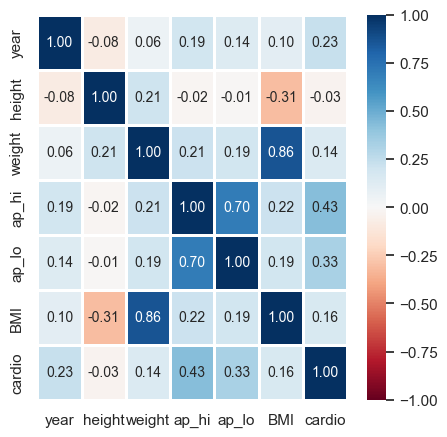

In [10]:
numericData = pd.DataFrame(cardioData[['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'cardio']])
f, axes = plt.subplots(1, 1, figsize=(5, 5))
sb.heatmap(numericData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

### Logistic Regression

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data into a DataFrame
data = cardioData.drop('cardio_bool', axis=1)

# One-hot encode categorical variables
categorical_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
data = pd.get_dummies(data, columns=categorical_vars)

# Split data into features and target variable
X = data.drop('cardio', axis=1)
y = data['cardio']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale numeric features
scaler = StandardScaler()
numeric_vars = ['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_test[numeric_vars] = scaler.transform(X_test[numeric_vars])

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7184095353384858


<AxesSubplot: >

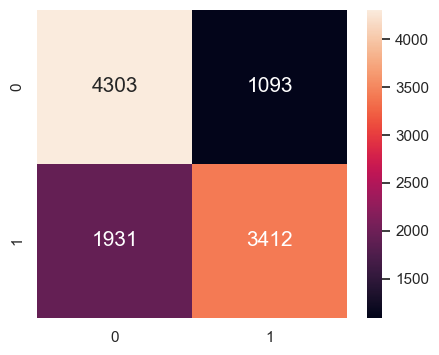

In [12]:
f, axes = plt.subplots(1, 1, figsize=(5, 4))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 15})

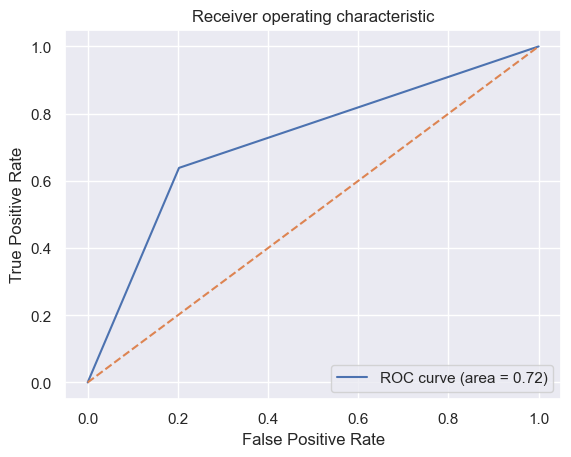

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calculate area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

#In a ROC curve plot, the blue line represents the performance of your logistic regression model at different classification thresholds. 
#The true positive rate (sensitivity) is plotted on the y-axis and the false positive rate (1 - specificity) is plotted on the x-axis. 
#The closer the blue line is to the top left corner of the plot, 
#the better your model is at distinguishing between positive and negative classes.

#The yellow dotted line represents a random classifier, 
#which has a true positive rate equal to the false positive rate for all classification thresholds. 
#This line serves as a baseline for comparison with your logistic regression model. 
#If your model performs better than a random classifier, the blue line will be above the yellow dotted line.

### Neural Network

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load data into a DataFrame
data = cardioData.drop('cardio_bool', axis=1)

# One-hot encode categorical variables
categorical_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
data = pd.get_dummies(data, columns=categorical_vars)

# Split data into features and target variable
X = data.drop('cardio', axis=1)
y = data['cardio']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale numeric features
scaler = StandardScaler()
numeric_vars = ['year', 'height', 'weight', 'ap_hi', 'ap_lo']
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_test[numeric_vars] = scaler.transform(X_test[numeric_vars])

# Fit MLP model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7227861067138467
